# Wordcloud for Live Streaming Chats

유튜브, 트위치 등 실시간 스트리밍 서비스의 채팅을 분석하여 실시간 워드클라우드 이미지를 제공합니다.

## 주의사항 및 라이브러리 설치

구글 Colab에는 한글 폰트가 설치되어 있지 않으므로, Wordcloud를 나타날 때 오류가 발생한다.<br>
따라서 아래 셀을 실행하여 `나눔폰트`를 설치하여야 한다.

설치 후에는 상단 메뉴의 **`런타임` > `런타임 다시 시작`**을 눌러 **재실행**하여야지 정상적으로 적용된다.

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


다시 한 번 말하지만, **`런타임 다시 시작`** 필수!!

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install chat_downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


# 라이브러리 불러오기

In [1]:
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
from chat_downloader import ChatDownloader
import matplotlib.pyplot as plt
import matplotlib.image as img
from IPython import display
import nltk
from nltk.corpus import stopwords

기본값 설정

In [2]:
okt = Okt()
nltk.download('stopwords')
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 스트리밍 주소를 `URL`에 복사하여 대체하면 된다.
지원 플랫폼 : 
- YouTube.com - Livestreams, past broadcasts and premieres.
- Twitch.tv - Livestreams, past broadcasts and clips.
- Reddit.com - Livestreams, past broadcasts

In [3]:
# url = "https://www.youtube.com/watch?v=4TEZMThPZnI"
# url = "https://www.twitch.tv/zilioner"
url = "https://www.twitch.tv/lol_ambition"

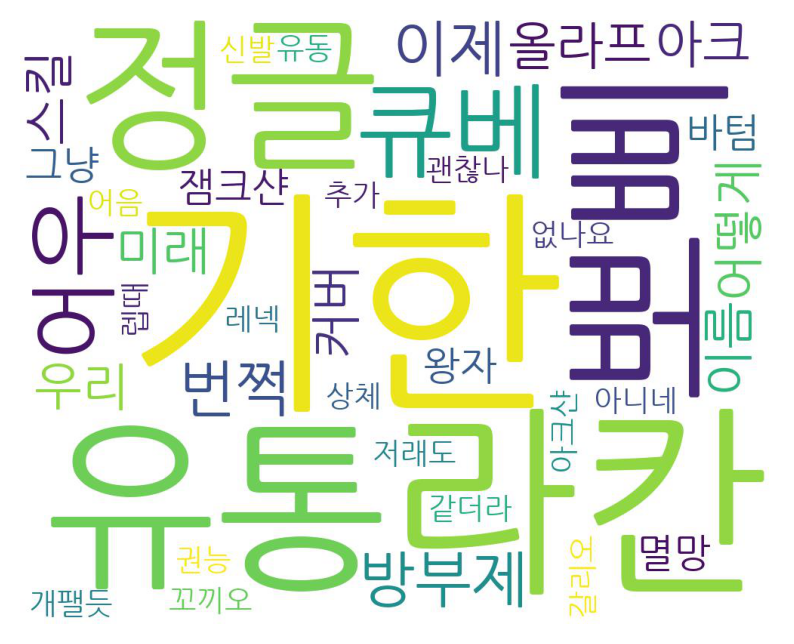

KeyboardInterrupt: ignored

In [4]:
chat = ChatDownloader().get_chat(url)

minimum_word_length = 2
noun_adj_list = []
korean_stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '입니다', '있음', '있어', '뭐', '구나', '끼리', '해도']
english_stopwords = stopwords.words('english')


for message in chat:                   
    # konlpy의 okt를 통한 형태소 분리
    msg_tag = okt.pos(message['message']) 


    for word, tag in msg_tag:
        if tag in ['Noun' , 'Adjective', 'Alpha']: # konlpy를 통해 명사, 형용사, 알파벳만 추출
            if (word not in korean_stopwords) and (word not in english_stopwords): # 불용어(stopwords) 제거
                if len(word) >= minimum_word_length: # 단어의 글자 수
                    noun_adj_list.append(word)
    

    # noun_adj_list에서 빈도 수가 가장 높은 40개의 단어만 추출
    counts = Counter(noun_adj_list)
    tags = counts.most_common(40) 

    try:
        # wordcloud 생성
        wc = WordCloud(font_path,background_color="white", width=1000, height=800)#, max_font_size=60)
        cloud = wc.generate_from_frequencies(dict(tags))
        cloud.to_file('wordcloud.jpg') # 파일 저장

        # 저장한 파일을 불러옴
        display.clear_output(wait=True)
        image = img.imread('wordcloud.jpg')
        plt.figure(dpi=200)
        plt.axis('off')
        plt.imshow(image)
        plt.show() 
        
    except ValueError: # 초기 채팅에 명사, 형용사가 없는 경우 발생하는 ValueError를 예외 처리
        pass